In [1]:
import numpy as np
import pandas as pd

- 시간 내에서 특정 순간의 타임스탬프
- 2007년 1월이나 2010년 전체 같은 고정된 기간
- 시작과 끝 타임스탬프로 표시되는 시간 간격, 기간은 시간 간격의 특수한 경우로 생각
- 실험 혹은 경과 시간. 각 타임스탬프는 특정 시작 시간에 상대적인 시간의 측정값이다.

# 날짜, 시간 자료형, 도구

In [1]:
from datetime import datetime

# datetime은 날짜와 시간을 모두 저장하며 마이크로초까지 지원

now = datetime.now()
now

datetime.datetime(2020, 8, 9, 16, 45, 14, 262238)

In [4]:
print(now.year, now.month, now.day, now.hour, now.minute, now.second)

2020 7 11 19 43 3


In [16]:
# 두 객체간 시간적 차이

delta = datetime(2020,7,4,8,14) - datetime(2017,4,6,8,15)

delta

datetime.timedelta(days=1184, seconds=86340)

In [3]:
start = datetime.now()
A = np.random.randint(1,100,size=(40,30))
B = np.random.randint(1,100,size=(30,50))
C = np.dot(A,B)
now = datetime.now()
now-start

datetime.timedelta(microseconds=7329)

In [17]:
print('날의 차: ',delta.days, '\n초단위의 차: ',delta.seconds)

날의 차:  1184 
초단위의 차:  86340


In [20]:
from datetime import timedelta
start = datetime.now()

# 일 단위로 더함

print(start + timedelta(12), start+ 2*timedelta(12))

2020-07-23 19:53:07.370100 2020-08-04 19:53:07.370100


# 문자열의 변환

In [22]:
stamp = datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [34]:
# strftime 함수는 datetime 객체를 받아 원하는 문자열 형식으로 변환

print(type(stamp.strftime('%Y/%m-%d')))
print(stamp.strftime('%Y/%m-%d'))

<class 'str'>
2011/01-03


In [2]:
# strptime은 알려진 형식의 날짜를 파싱하는 방법
# 다음처럼 하면 문자열의 형식과 일치하지 않으므로 에러가 뜬다

try:
    value = '2011-01-03'
    datetime.strptime(value,'%Y/%m/%d')
except:
    print('에러입니다.')

에러입니다.


In [35]:
# 문자열과 형식을 맞춰야함

value = '2011-01-03'
datetime.strptime(value,'%Y-%d-%m')

datetime.datetime(2011, 3, 1, 0, 0)

In [4]:
value = '2011/01--03'
datetime.strptime(value,'%Y/%d--%m')

datetime.datetime(2011, 3, 1, 0, 0)

In [37]:
# 일일이 문자열의 형식을 맞춰주는 것은 번거롭기 때문에 parse함수로 자동으로 맞춰줄 수 있다.

from dateutil.parser import parse
parse('2011/01-07')

datetime.datetime(2011, 1, 7, 0, 0)

In [38]:
# 다음과 같이 난잡한 형식도 쉽게 파싱

parse('Jan 31,1997 10:45PM')

datetime.datetime(2020, 1, 31, 22, 45)

In [40]:
# 날짜가 월 앞에 오는 경우
print(parse('6/12/2011'))
print(parse('6/12/2011',dayfirst=True))

2011-06-12 00:00:00
2011-12-06 00:00:00


일반적으로 DataFrame의 컬럼이나 축 색인으로 날짜가 담긴 배열을 사용하는데 pandas의 to_datetime 메서드는 많은 종류의 날짜 표현을 처리한다.

In [41]:
# 표준 날짜 형식은 매우 빠르게 처리
datestrs = ['2011-07-06 12:00:00','2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [43]:
# NaT는 pandas에서 누락된 타임스탬프를 나타냄

pd.to_datetime(datestrs+[None])

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

# 시계열 기초

In [6]:
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]

ts = pd.Series(np.random.randn(6),index=dates)

In [7]:
ts

2011-01-02   -0.743919
2011-01-05   -0.007231
2011-01-07   -0.404229
2011-01-08   -0.661643
2011-01-10   -0.307668
2011-01-12    1.574062
dtype: float64

In [8]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [9]:
# 당연한 얘기지만 산술연산은 인덱스(날짜)에 맞춰진다.
(ts + ts[::2])/2

2011-01-02   -0.743919
2011-01-05         NaN
2011-01-07   -0.404229
2011-01-08         NaN
2011-01-10   -0.307668
2011-01-12         NaN
dtype: float64

In [10]:
# pandas에 저장된 datetime의 객체명은 Timestamp

ts.index[0]

Timestamp('2011-01-02 00:00:00')

In [11]:
# 인덱스 말고 데이터 value로 저장되었어도 마찬가지

aa = pd.Series([datetime(2011,1,2),datetime(2011,1,4)])
aa[1]

Timestamp('2011-01-04 00:00:00')

- Timestamp는 datetime 객체를 사용하는 어떤 곳에서도 대체 사용이 가능하다.
- pandas는 NumPy의 datetime64 자료형을 이용해 나노초의 정밀도를 가지는 타임스탬프를 저장한다.
- 가능하면 빈도에 관한 정보도 저장하며 시간대 변환을 하는 방법과 다른 종류의 조작을 하는 방법 역시 포함한다.

## 색인, 선택, 부분 선택
시계열은 라벨에 기반해 데이터를 선택하고 인덱싱할 때 보통 Series와 동일하게 동작한다.

In [16]:
stamp = ts.index[0]
ts[stamp]

-0.7439188968020933

In [20]:
# 해석할 수 있는 날짜를 문자열로 넘겨서 편리하게 사용할 수 있다. parse함수처럼 알아서 파싱해준다.
ts

2011-01-02   -0.743919
2011-01-05   -0.007231
2011-01-07   -0.404229
2011-01-08   -0.661643
2011-01-10   -0.307668
2011-01-12    1.574062
dtype: float64

In [18]:
ts['2011/01/08']

-0.6616434080249466

In [19]:
ts['20110110']

-0.3076678236755808

In [21]:
ts['1/5/2011']

-0.0072310381280341505

#### 긴 시계열에서는 년, 월 단위만 선택할 수 있다.

In [24]:
# date_range 함수 기억

long_ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
long_ts

2000-01-01   -0.937374
2000-01-02    0.921644
2000-01-03   -0.696241
2000-01-04    0.326193
2000-01-05   -0.238474
                ...   
2002-09-22    0.324839
2002-09-23    0.301935
2002-09-24    0.763745
2002-09-25    0.544767
2002-09-26    0.029824
Freq: D, Length: 1000, dtype: float64

In [25]:
long_ts['2001']

2001-01-01    1.735253
2001-01-02   -0.973069
2001-01-03   -0.752035
2001-01-04   -1.883276
2001-01-05   -1.698077
                ...   
2001-12-27    0.951499
2001-12-28    0.740550
2001-12-29   -0.080540
2001-12-30    0.731187
2001-12-31   -2.769073
Freq: D, Length: 365, dtype: float64

In [27]:
len(long_ts['2001/4'])

30

In [28]:
# 슬라이싱 역시 일반적인 Series와 동일하게 수행할 수 있다.

long_ts[datetime(2001,12,13):datetime(2001,12,17)]

2001-12-13   -1.200326
2001-12-14    0.322133
2001-12-15   -0.137647
2001-12-16    0.241824
2001-12-17   -2.171092
Freq: D, dtype: float64

In [31]:
long_ts['2001-12-13':'2001/12/17':2]

2001-12-13   -1.200326
2001-12-15   -0.137647
2001-12-17   -2.171092
Freq: 2D, dtype: float64

In [37]:
# 같은 기능의 메서드

long_ts.truncate(before='1/9/2001',after='1/18/2001')

2001-01-09   -0.946801
2001-01-10   -0.784732
2001-01-11   -1.948494
2001-01-12    0.880699
2001-01-13   -0.744889
2001-01-14    1.264778
2001-01-15   -0.023458
2001-01-16    0.351655
2001-01-17   -0.146364
2001-01-18   -0.009957
Freq: D, dtype: float64

- DataFrame에도 동일하게 적용된다. loc 등의 함수를 이용하면 된다.

## 중복된 색인에 대하여

In [39]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
dup_ts = pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [40]:
dup_ts.index.is_unique

False

In [50]:
try:
    grouped = dup_ts.groupby()
except:
    print('에러입니다.')

에러입니다.


In [51]:
# 유일하지 않은 타임스탬프를 가지는 데이터를 집계한다면 groupby에 level=0(단일 단계 인덱싱)을 넘기는 것

grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [42]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 날짜 범위, 빈도, 이동
pandas의 일반적인 시계열은 불규칙적인 것으로 간주된다. 즉, 고정된 빈도를 갖지 않는다. 대부분의 어플리케이션에서는 이로 충분하지만 매 15분, 일별, 월별 같은 고정 빈도에서의 작업이 요구되는 경우가 종종 있다.

pandas에는 리샘플링, 표준 시계열 빈도 모음, 빈도 추론, 고정된 빈도의 날짜 범위를 위한 도구가 제공된다.

In [52]:
ts

2011-01-02   -0.743919
2011-01-05   -0.007231
2011-01-07   -0.404229
2011-01-08   -0.661643
2011-01-10   -0.307668
2011-01-12    1.574062
dtype: float64

## 날짜 범위

In [54]:
# 기본값은 일별 타임스탬프 생성
index = pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [58]:
# period는 생성할 날짜의 개수

pd.date_range(start='2012-04-01',periods=10)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10'],
              dtype='datetime64[ns]', freq='D')

In [59]:
pd.date_range(end='2012-04-01',periods=10)

DatetimeIndex(['2012-03-23', '2012-03-24', '2012-03-25', '2012-03-26',
               '2012-03-27', '2012-03-28', '2012-03-29', '2012-03-30',
               '2012-03-31', '2012-04-01'],
              dtype='datetime64[ns]', freq='D')

In [60]:
# 독특한 방식의 빈도값을 줄 수 있는데 예를 들어 'BM'은 매 월 영업마감일을 나타낸다.

pd.date_range('2000-01-01','2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

- D: 달력상 일,  B: 매 영업일,  H/ T 혹은 min/ S: 매시/매분/매초,  L 혹은 ms/U: 밀리초/마이크로초
- M: 월 마지막 일,  BM: 월 영업마감일,  MS: 월 시작일,  BMS: 월 영업시작일
- W-MON, W-TUE,...: 매 해당 요일,  WOM-1MON, WOM-2MON...:월별 주차와 요일, 예를 들어 WOM-3FRI는 매월 3째 주 금요일이다.

나머지는 책이나 사진을 참고하시라

In [69]:
pd.date_range('2018-01-01','2020/01/03',freq='WOM-4TUE')

DatetimeIndex(['2018-01-23', '2018-02-27', '2018-03-27', '2018-04-24',
               '2018-05-22', '2018-06-26', '2018-07-24', '2018-08-28',
               '2018-09-25', '2018-10-23', '2018-11-27', '2018-12-25',
               '2019-01-22', '2019-02-26', '2019-03-26', '2019-04-23',
               '2019-05-28', '2019-06-25', '2019-07-23', '2019-08-27',
               '2019-09-24', '2019-10-22', '2019-11-26', '2019-12-24'],
              dtype='datetime64[ns]', freq='WOM-4TUE')

In [72]:
pd.date_range('2019-11-16','2020-1-16',freq='W-WED')

DatetimeIndex(['2019-11-20', '2019-11-27', '2019-12-04', '2019-12-11',
               '2019-12-18', '2019-12-25', '2020-01-01', '2020-01-08',
               '2020-01-15'],
              dtype='datetime64[ns]', freq='W-WED')

In [80]:
pd.date_range('2019-11-16 20:00:34','2019-11-17 13:00:34',freq='1h30min')

DatetimeIndex(['2019-11-16 20:00:34', '2019-11-16 21:30:34',
               '2019-11-16 23:00:34', '2019-11-17 00:30:34',
               '2019-11-17 02:00:34', '2019-11-17 03:30:34',
               '2019-11-17 05:00:34', '2019-11-17 06:30:34',
               '2019-11-17 08:00:34', '2019-11-17 09:30:34',
               '2019-11-17 11:00:34', '2019-11-17 12:30:34'],
              dtype='datetime64[ns]', freq='90T')

In [73]:
# 기본적으로 시작 시간이나 종료 시간의 타임스탬프(존재한다면)를 보존한다.
pd.date_range('2012-05-02 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [76]:
# 관례에 맞게 자정에 맞춰 정규화하고자 할 때
pd.date_range('2012-05-02 12:56:31',periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [77]:
pd.date_range('2012-05-02 12:56:31',periods=5, normalize=True)[0]

Timestamp('2012-05-02 00:00:00', freq='D')

## 데이터 시프트
데이터를 시간 축에서 앞이나 뒤로 이동하는 것을 의미<br>
pandas에는 색인을 변경하지 않고 데이터를 앞이나 뒤로 느슨한 시프트를 수행하는 shift 메서드를 가지고 있음<br>
shift 메서드 자체는 시계열에 관계없이 사용이 가능

In [87]:
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000',periods=4,freq='MS'))
ts

2000-01-01    0.002172
2000-02-01    0.755591
2000-03-01   -0.183988
2000-04-01   -0.533402
Freq: MS, dtype: float64

In [88]:
ts.shift(2)

2000-01-01         NaN
2000-02-01         NaN
2000-03-01    0.002172
2000-04-01    0.755591
Freq: MS, dtype: float64

In [89]:
ts.shift(-2)

2000-01-01   -0.183988
2000-02-01   -0.533402
2000-03-01         NaN
2000-04-01         NaN
Freq: MS, dtype: float64

In [91]:
# 결측치가 발생하게 되는데 빈도를 알고 있다면 shift에 빈도를 넘겨 타임스탬프 자체가 확장되도록 할 수 있다.

ts.shift(2,freq='MS')

2000-03-01    0.002172
2000-04-01    0.755591
2000-05-01   -0.183988
2000-06-01   -0.533402
Freq: MS, dtype: float64

In [92]:
ts.shift(2,freq='D')

2000-01-03    0.002172
2000-02-03    0.755591
2000-03-03   -0.183988
2000-04-03   -0.533402
dtype: float64

In [94]:
ts.shift(3,freq='90T')
# ==ts.shift(3,freq='1h30min')

2000-01-01 04:30:00    0.002172
2000-02-01 04:30:00    0.755591
2000-03-01 04:30:00   -0.183988
2000-04-01 04:30:00   -0.533402
Freq: MS, dtype: float64

#### 참고) 빈도수를 직접 정의하기

In [104]:
from pandas.tseries import offsets
a = offsets.Hour(4)+offsets.Second(15)

In [96]:
pd.date_range('2020/7/19',freq=a,periods=5)

DatetimeIndex(['2020-07-19 00:00:00', '2020-07-19 04:00:15',
               '2020-07-19 08:00:30', '2020-07-19 12:00:45',
               '2020-07-19 16:01:00'],
              dtype='datetime64[ns]', freq='14415S')

In [97]:
# 날짜 오프셋은 바로 연산에도 적용가능
datetime(2020,7,6,13,30)+a

Timestamp('2020-07-06 17:30:15')

In [107]:
# 날짜 당기고 밀기
a = offsets.MonthEnd()
now = datetime.now()

In [99]:
a.rollforward(now)

Timestamp('2020-07-31 20:05:59.621454')

In [100]:
a.rollback(now)

Timestamp('2020-06-30 20:05:59.621454')

### (유용) groupby와 결합

In [102]:
ts = pd.Series(np.random.randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))
ts

2000-01-15    1.306955
2000-01-19    0.465767
2000-01-23   -1.139345
2000-01-27   -0.532415
2000-01-31   -1.004944
2000-02-04   -0.632147
2000-02-08   -0.380419
2000-02-12    1.150356
2000-02-16    0.020456
2000-02-20    1.724955
2000-02-24   -0.768174
2000-02-28   -1.181339
2000-03-03   -1.948139
2000-03-07   -0.239954
2000-03-11   -0.406812
2000-03-15   -2.917013
2000-03-19    1.000507
2000-03-23   -0.342479
2000-03-27    1.057336
2000-03-31    0.191365
Freq: 4D, dtype: float64

In [108]:
# a = offsets.MonthEnd()
ts.groupby(a.rollforward).mean()

# resample로도 동일한 연산을 수행할 수 있는데 차후 서술

2000-01-31   -0.180796
2000-02-29   -0.009473
2000-03-31   -0.450649
dtype: float64

# 시간대 다루기
국제표준시(UTC)를 기본으로 선택하지만 pytz 라이브러리를 이용해 DST(서머타임, 일광절약시간)과 여러 지역 시간대로 변경할 수 있다.<br>
다른 시간대끼리의 연산 역시 가능한데 연산 후에는 UTC가 된다. 

자세한 내용은 책을 참고.

# 기간과 기간 연산
기간(며칠, 몇 개월, 몇 분기, 몇 해 등)은 Period 클래스로 표현이 가능 

In [5]:
# A-JAN, A-FEB....는 주어진 월의 마지막 일을 가리키는 연간 주기
# 다음 Period 객체는 2007년 1월 1일부터 같은 해 12월 31일까지의 기간을 표현

p = pd.Period(2007,freq='A-DEC')
p

Period('2007', 'A-DEC')

In [110]:
p+5

Period('2012', 'A-DEC')

In [111]:
p-2

Period('2005', 'A-DEC')

In [113]:
# 같은 빈도를 가지는 두 기간의 차는 간격이 된다.
pd.Period('2014',freq='A-DEC') - p

<7 * YearEnds: month=12>

In [8]:
# 일반적인 기간 범위는 period_range 함수로 생성 가능

rng = pd.period_range('2000-01-01','2000-06-30',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [116]:
# PeriodIndex 클래스는 순차적인 기간을 저장, pandas의 색인으로 사용 가능
pd.Series(np.random.randn(6),index=rng)

2000-01    0.637599
2000-02    0.300003
2000-03   -1.161678
2000-04    1.128345
2000-05    1.146876
2000-06    0.207242
Freq: M, dtype: float64

In [118]:
# Q-JAN, Q-FEB....: 지정된 월을 해당년도의 마감으로 하여 지정된 월의 마지막 날짜를 가리키는 분기 주기
# 문자열 배열로 PeriodIndex 클래스 생성 가능

values = ['2001','2002Q2','2003Q1']
index = pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2001Q1', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [119]:
# asfreq 메서드로 빈도 변환 가능, p는 새해 첫날부터 시작하는 연간 빈도
p

Period('2007', 'A-DEC')

In [120]:
# 월간 빈도로 변환
p.asfreq('M',how='start')   # start는 그 기간의 처음으로 맞추는 것

Period('2007-01', 'M')

In [121]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [123]:
p2 = pd.Period('2007',freq='A-JUN')
p2

Period('2007', 'A-JUN')

In [124]:
p2.asfreq('M','start')

Period('2006-07', 'M')

In [10]:
# 빈도가 상위 단계(더 자세한 기간)에서 하위 단계(더 포괄적인 기간)로 변환되는 경우 
# 상위 기간은 하위 기간이 어디에 속했는지에 따라 결정된다.

p = pd.Period('Aug/2007','M')
p

Period('2007-08', 'M')

In [11]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [13]:
# PeriodIndex 객체나 시계열은 앞의 모든 내용과 같은 방식으로 변환 가능

rng = pd.period_range('2006','2009',freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')

In [14]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2006   -1.160977
2007   -0.631376
2008   -1.219817
2009   -0.990349
Freq: A-DEC, dtype: float64

In [15]:
ts.asfreq('M',how='start')

2006-01   -1.160977
2007-01   -0.631376
2008-01   -1.219817
2009-01   -0.990349
Freq: M, dtype: float64

In [21]:
ts.asfreq('S',how='end')

2006-12-31 23:59:59   -1.160977
2007-12-31 23:59:59   -0.631376
2008-12-31 23:59:59   -1.219817
2009-12-31 23:59:59   -0.990349
Freq: S, dtype: float64

정리) 기간에 관련된 객체(Period,PeriodIndex)는 asfreq 메서드를 통해 다른 빈도로 변환할 수 있고 처음과 끝 역시 지정 가능하다.

Q-DEC 등을 사용하는 분기 빈도와 관련된 설명은 책을 참고

## 타임스탬프와 기간 서로 변환하기

In [26]:
# 참고) M은 월 마지막 일, MS는 월 시작일
rng = pd.date_range('2000-01-01',periods=3,freq='M')
ts = pd.Series(np.random.randn(3),index=rng)
ts

2000-01-31   -0.599739
2000-02-29   -0.479458
2000-03-31   -0.987674
Freq: M, dtype: float64

In [27]:
# 기간으로의 변환

ts.to_period()

2000-01   -0.599739
2000-02   -0.479458
2000-03   -0.987674
Freq: M, dtype: float64

In [29]:
# PeriodIndex의 빈도는 기본적으로 타임스탬프의 값을 통해 (하나의 기간에만 속하도록) 추론되나 원하는 빈도를 직접 입력하는 것도 가능

rng = pd.date_range('1/29/2000',periods=6,freq='D')
ts2 = pd.Series(np.random.randn(len(rng)),index=rng)
ts2

2000-01-29   -0.522048
2000-01-30    0.953873
2000-01-31    0.665222
2000-02-01   -1.271087
2000-02-02    0.141902
2000-02-03   -0.002990
Freq: D, dtype: float64

In [42]:
ts2.to_period('M')

2000-01   -0.522048
2000-01    0.953873
2000-01    0.665222
2000-02   -1.271087
2000-02    0.141902
2000-02   -0.002990
Freq: M, dtype: float64

In [40]:
pts = ts2.to_period()
pts

2000-01-29   -0.522048
2000-01-30    0.953873
2000-01-31    0.665222
2000-02-01   -1.271087
2000-02-02    0.141902
2000-02-03   -0.002990
Freq: D, dtype: float64

In [44]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.522048
2000-01-30 23:59:59.999999999    0.953873
2000-01-31 23:59:59.999999999    0.665222
2000-02-01 23:59:59.999999999   -1.271087
2000-02-02 23:59:59.999999999    0.141902
2000-02-03 23:59:59.999999999   -0.002990
Freq: D, dtype: float64

## 배열로 PeriodIndex 생성하기

In [45]:
data = pd.read_csv('macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [47]:
# year 컬럼과 quarter 컬럼을 조합해 PeriodIndex에 빈도값과 함께 전달해 색인을 만들어낸다.
# Q-월 : 지정된 월을 해당년도의 마지막으로 하여 지정된 월의 마지막 날짜를 가리키는 분기 주기

index = pd.PeriodIndex(year = data.year, quarter=data.quarter, freq='Q-DEC')

In [49]:
data.index=index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 리샘플링과 빈도 변환
리샘플링은 시계열의 빈도를 변환하는 과정을 말한다.
- 다운샘플링: 상위->하위(더 포괄적으로)
- 업샘플링: 하위->상위(더 상세하게)
<br> W-WED를 W-FRI로 바꾸는 것은 리샘플링이지만 업도 다운도 아니다.

pandas는 resample 메서드를 가지고 있는데, groupby와 비슷한 API를 가지고 있다.

In [51]:
rng = pd.date_range('2000-01-01',periods=100,freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01    1.758435
2000-01-02    0.437840
2000-01-03   -0.351490
2000-01-04   -0.169942
2000-01-05    1.362484
                ...   
2000-04-05    0.763850
2000-04-06    1.542121
2000-04-07   -1.690935
2000-04-08   -0.146405
2000-04-09   -0.530416
Freq: D, Length: 100, dtype: float64

In [54]:
ts.resample('M').mean()

2000-01-31    0.021777
2000-02-29   -0.201543
2000-03-31   -0.191396
2000-04-30    0.120631
Freq: M, dtype: float64

In [57]:
# agg도 사용가능
# kind 인자로 타임스탬프 or 기간 형태를 선택할 수 있음

ts.resample('M',kind='period').agg(['mean','sum'])

,mean,sum
2000-01,0.021777,0.675078
2000-02,-0.201543,-5.844738
2000-03,-0.191396,-5.933279
2000-04,0.120631,1.085676


resample 메서드 인자에 대한 설명은 책이나 사진을 참고, freq, axis, fill_method, kind, closed, label, loffset, limit, convention 등이 있다.

## 다운샘플링
고려사항
- 각 간격의 양끝 중 어느쪽을 닫아둘 것인가(closed 인자)
- 집계하려는 구간의 라벨을 간격의 시작으로 할지 끝으로 할지 여부

In [60]:
rng = pd.date_range('2000-01-01',periods=12,freq='T')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01 00:00:00    0.875421
2000-01-01 00:01:00    0.991710
2000-01-01 00:02:00   -0.983068
2000-01-01 00:03:00    0.196465
2000-01-01 00:04:00    0.837899
2000-01-01 00:05:00   -0.908449
2000-01-01 00:06:00    0.256902
2000-01-01 00:07:00   -0.371962
2000-01-01 00:08:00   -2.395854
2000-01-01 00:09:00   -1.066743
2000-01-01 00:10:00    1.385698
2000-01-01 00:11:00    0.185716
Freq: T, dtype: float64

In [75]:
# 각 구간의 오른쪽 값들, < 관계이지 <= 관계는 아님

ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00    0.875421
2000-01-01 00:00:00    0.134557
2000-01-01 00:05:00   -2.191959
2000-01-01 00:10:00    0.185716
Freq: 5T, dtype: float64

In [64]:
# 기본값, 각 구간의 오른쪽 값인건 마찬가지, < 관계가 아닌 <=관계

ts.resample('5min',closed='left').sum()

2000-01-01 00:00:00    1.918427
2000-01-01 00:05:00   -4.486105
2000-01-01 00:10:00    1.571413
Freq: 5T, dtype: float64

In [68]:
# loffset : 나뉜 그룹의 라벨을 맞추기 위한 오프셋, '-1s'/Second(-1)은 집계된 라벨을 1초 앞당긴다.
# label :  다운샘플링시 집계된 결과의 라벨을 정함. 즉 구간의 양 끝 값의 왼쪽에 맞출지 오른쪽에 맞출지 결정

ts.resample('5min',closed='right',label='right',loffset='-1s').agg('sum')
# ts.resample('5min',closed='right',label='right').agg('sum').shift(-1,freq='s') 는 동일한 결과

1999-12-31 23:59:59    0.875421
2000-01-01 00:04:59    0.134557
2000-01-01 00:09:59   -2.191959
2000-01-01 00:14:59    0.185716
Freq: 5T, dtype: float64

#### 참고)OHLC 리샘플링
시가(open), 고가(high), 저가(low), 종가(close), 금융분야에서 흔히 쓰는 방식

In [78]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0.875421,0.991710,-0.983068,0.837899
2000-01-01 00:05:00,-0.908449,0.256902,-2.395854,-1.066743
2000-01-01 00:10:00,1.385698,1.385698,0.185716,0.185716


In [81]:
import warnings
warnings.filterwarnings('ignore')

# 동일한 결과
ts.resample('5min',how='ohlc')

,open,high,low,close
2000-01-01 00:00:00,0.875421,0.991710,-0.983068,0.837899
2000-01-01 00:05:00,-0.908449,0.256902,-2.395854,-1.066743
2000-01-01 00:10:00,1.385698,1.385698,0.185716,0.185716


## 업샘플링과 보간
집계가 필요하지는 않음

In [103]:
df = pd.DataFrame(np.random.randn(2,4),index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                  columns=['Colorado','Texas','New York','Ohio'])
df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.355148,0.279341,1.062755,1.187711
2000-01-12,0.235201,0.385644,2.530131,-1.612731


In [104]:
df_upresample = df.resample('D').asfreq()
df_upresample

,Colorado,Texas,New York,Ohio
2000-01-05,-0.355148,0.279341,1.062755,1.187711
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.235201,0.385644,2.530131,-1.612731


In [105]:
# 보간
df_upresample = df.resample('D').ffill()
df_upresample

,Colorado,Texas,New York,Ohio
2000-01-05,-0.355148,0.279341,1.062755,1.187711
2000-01-06,-0.355148,0.279341,1.062755,1.187711
2000-01-07,-0.355148,0.279341,1.062755,1.187711
2000-01-08,-0.355148,0.279341,1.062755,1.187711
2000-01-09,-0.355148,0.279341,1.062755,1.187711
2000-01-10,-0.355148,0.279341,1.062755,1.187711
2000-01-11,-0.355148,0.279341,1.062755,1.187711
2000-01-12,0.235201,0.385644,2.530131,-1.612731


In [106]:
# limit옵션으로 보간의 범위를 지정(보통의 fillna 함수에서도 사용가능)
df.resample('D').bfill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.355148,0.279341,1.062755,1.187711
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,0.235201,0.385644,2.530131,-1.612731
2000-01-11,0.235201,0.385644,2.530131,-1.612731
2000-01-12,0.235201,0.385644,2.530131,-1.612731


In [109]:
# 새 날짜 색인은 이전 색인과 겹칠 필요가 없음
df.resample('W-THU').sum()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.355148,0.279341,1.062755,1.187711
2000-01-13,0.235201,0.385644,2.530131,-1.612731


In [108]:
df.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.355148,0.279341,1.062755,1.187711
2000-01-13,0.235201,0.385644,2.530131,-1.612731


## 기간 리샘플링

In [110]:
df = pd.DataFrame(np.random.randn(24,4),index=pd.period_range('1-2000','12-2001',freq='M'),
                 columns=['Colorado','Texas','New York','Ohio'])
df.head()

,Colorado,Texas,New York,Ohio
2000-01,-0.066746,-0.109659,1.700841,0.161942
2000-02,-0.685687,0.242735,-0.775320,0.212368
2000-03,-0.189183,-0.533590,0.500145,0.421253
2000-04,-0.299938,-1.790720,0.762470,-1.017969
2000-05,0.079460,-0.192241,-0.599762,0.355887


In [111]:
# 다운샘플링
# A-DEC : 주어진 월의 마지막 일을 가리키는 연간주기

df_re = df.resample('A-DEC').mean()
df_re

,Colorado,Texas,New York,Ohio
2000,0.007061,-0.450750,0.001314,0.265317
2001,0.031408,-0.217711,-0.302498,0.245231


In [112]:
# 업샘플링

df_re.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.007061,-0.450750,0.001314,0.265317
2000Q2,0.007061,-0.450750,0.001314,0.265317
2000Q3,0.007061,-0.450750,0.001314,0.265317
2000Q4,0.007061,-0.450750,0.001314,0.265317
2001Q1,0.031408,-0.217711,-0.302498,0.245231
2001Q2,0.031408,-0.217711,-0.302498,0.245231
2001Q3,0.031408,-0.217711,-0.302498,0.245231
2001Q4,0.031408,-0.217711,-0.302498,0.245231


기간의 업샘플링과 다운샘플링은 몇가지 규칙이 따른다.
- 다운샘플링의 경우 대상 빈도는 반드시 원본 빈도의 하위 기간이어야 한다.
- 업샘플링의 경우 대상 빈도는 반드시 원본 빈도의 상위 기간이어야 한다.

In [113]:
df_re.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.007061,-0.450750,0.001314,0.265317
2001Q1,0.007061,-0.450750,0.001314,0.265317
2001Q2,0.007061,-0.450750,0.001314,0.265317
2001Q3,0.007061,-0.450750,0.001314,0.265317
2001Q4,0.031408,-0.217711,-0.302498,0.245231
2002Q1,0.031408,-0.217711,-0.302498,0.245231
2002Q2,0.031408,-0.217711,-0.302498,0.245231
2002Q3,0.031408,-0.217711,-0.302498,0.245231


# 이동창 함수(moving window function)

시계열 연산에서는 통계 등의 함수들을 이용해 누락된 데이터를 매끄럽게 다듬는 기술 등이 매우 중요하다.<br>
moving window function이란 고정된 크기의 창을 가지지 않는 함수들을 말한다.

In [2]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우)
font_path = ''
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font_name)


In [3]:
# parse_dates를 True로 함으로서 timestamp indexe들이 깔끔해졌다.
close_px_all = pd.read_csv('stock_px_2.csv',parse_dates=True,index_col=0)
close_px_all.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [4]:
close_px = close_px_all.drop('SPX',axis=1)

In [17]:
close_px = close_px.resample('B').ffill()
close_px.iloc[20:26]

,AAPL,MSFT,XOM
2003-01-30,7.16,18.95,27.37
2003-01-31,7.18,18.65,28.13
2003-02-03,7.33,19.08,28.52
2003-02-04,7.30,18.59,28.52
2003-02-05,7.22,18.45,28.11
2003-02-06,7.22,18.63,27.87


### rolling 함수
groupby나 resample과 유사하게 동작하지만 그룹을 생성하는 대신 250일(아래 예제 기준) 크기의 움직이는 창을 그룹핑할 수 있는 객체 생성

Text(0.5, 1.0, '애플 주가의 250일 이동평균')

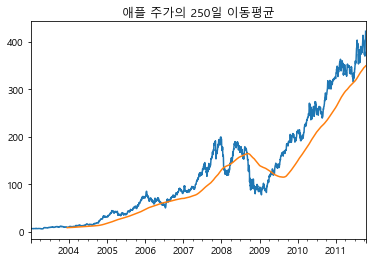

In [48]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()
plt.title('애플 주가의 250일 이동평균')

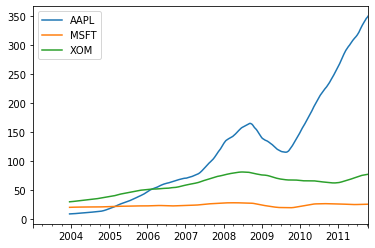

In [29]:
# 249개의 결측치가 존재
close_px.rolling(250).mean().plot()

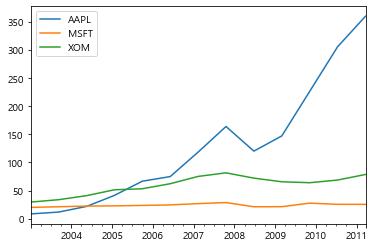

In [72]:
# 위와 비교

close_px.resample('250d').mean().plot()

결측치가 없는 것이 좋지만 시계열의 시작 지점에서는 필연적으로 window보다 적은 기간의 데이터를 가지고 있으므로 이를 처리하기 위해 rolling 함수의 동작 방식은 변경될 수 있다.

In [53]:
# 250일 간의 이동평균이되 250개의 데이터가 없을 경우 최소 10일 간의 이동평균
close_px.AAPL.rolling(250,min_periods=10).mean()

# close_px.AAPL.rolling(250).mean()이면 249번째 데이터까지는 결측치

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    347.58772
2011-10-11    347.95668
2011-10-12    348.33412
2011-10-13    348.74688
2011-10-14    349.23096
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In [59]:
close_px.AAPL.rolling(250).mean()[247:251]

2003-12-15        NaN
2003-12-16        NaN
2003-12-17    9.22340
2003-12-18    9.23388
Freq: B, Name: AAPL, dtype: float64

Text(0.5, 1.0, '애플의 250일 일별 수익 표준편차')

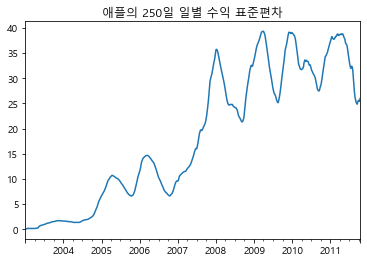

In [35]:
appl_std250 = close_px.AAPL.rolling(250,min_periods=10).std()
appl_std250.plot()
plt.title('애플의 250일 일별 수익 표준편차')

In [60]:
# expanding 함수
# 확장자 평균을 구하기 위해서 rolling 대신 사용
# 확장자 평균은 시계열의 시작 지점에서부터 창의 크기가 시계열의 전체 크기가 될 때까지 점점 창의 크기를 늘린다.

expanding_mean = appl_std250.expanding().mean()

In [77]:
# rolling 함수는 고정 크기의 기간 지정 문자열을 넘겨 호출할 수 있다. 빈도가 불규칙한 시계열에 유용

close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [75]:
close_px.rolling(20).mean()

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN
...,...,...,...
2011-10-10,392.1690,25.9635,72.7975
2011-10-11,392.9525,26.0115,73.0285
2011-10-12,393.5970,26.0345,73.2545
2011-10-13,394.3705,26.0440,73.3725


In [81]:
close_px[-20:].mean()

AAPL    395.4455
MSFT     26.0515
XOM      73.5505
dtype: float64

In [84]:
close_px[-15:].mean()

AAPL    391.038000
MSFT     26.048667
XOM      74.185333
dtype: float64

'20D'와 20이 차이나는 이유는 '20D'의 경우 날짜 20일(중간에 휴일 다 포함)의 평균을 계산하고 20의 경우 20개의 행(휴일 미포함)의 평균을 계산하기 때문

## 지수 가중 함수
균등한 가중치를 가지는 관찰과 함께 고정 크기 창을 사용하는 다른 방법은 감쇠인자(decay factor) 상수에 좀 더 많은 가중치를 줘서 더 최근 값을 관찰하는 것이다. 감쇠인자 상수를 지정하는데 널리 쓰이는 방법은 기간을 이용하는 것이다.

pandas는 rolling이나 expanding과 함께 사용할 수 잇는 ewm 연산을 제공한다.

In [5]:
aapl_px = close_px.AAPL['2006':'2007']
aapl_px

2006-01-03     74.75
2006-01-04     74.97
2006-01-05     74.38
2006-01-06     76.30
2006-01-09     76.05
               ...  
2007-12-24    198.80
2007-12-26    198.95
2007-12-27    198.57
2007-12-28    199.83
2007-12-31    198.08
Name: AAPL, Length: 502, dtype: float64

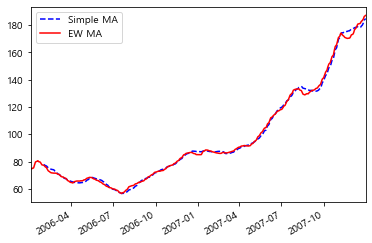

In [11]:
# ewm 메서드 사용
ewma30 = aapl_px.ewm(span=30).mean()

# 이동평균과 비교
m30 = aapl_px.rolling(30,min_periods=20).mean()
m30.plot(style='b--',label='Simple MA')
ewma30.plot(style='r-',label="EW MA")
plt.legend()

## 이진 이동창 함수

In [12]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [17]:
# pct_change는 현재값/이전값(period 옵션)
returns

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684
2003-01-06,0.000000,0.017975,0.024624
2003-01-07,-0.002685,0.019052,-0.033712
2003-01-08,-0.020188,-0.028272,-0.004145
...,...,...,...
2011-10-10,0.051406,0.026286,0.036977
2011-10-11,0.029526,0.002227,-0.000131
2011-10-12,0.004747,-0.001481,0.011669
2011-10-13,0.015515,0.008160,-0.010238


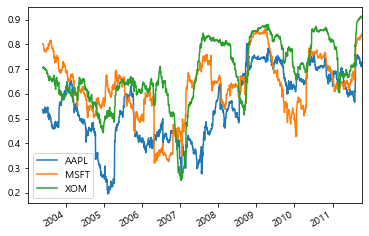

In [34]:
corr = returns.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()